<a href="https://colab.research.google.com/github/salvatorxx/Sentiment-Analysis/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Library that needed

In [ ]:
import nltk

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re 
import string

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
import tweepy as tw


from sklearn.metrics import r2_score


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Read data set positive and negative dataset

In [ ]:
Positive_Dataset = pd.read_csv(
    'https://raw.githubusercontent.com/NatanaelGeraldoS/Machine-Learning/main/Dataset%201%20Happy.txt', names=['Text'], sep='|')
Negative_Dataset = pd.read_csv(
    'https://raw.githubusercontent.com/NatanaelGeraldoS/Machine-Learning/main/Negative%20Dataset.txt', names=['Text'], sep='|')

In [ ]:
def CleaningData(Text):
  stopwords_english = stopwords.words('english')

  Text = re.sub(r'\$\w*', '', Text)

  Text = re.sub(r'^RT[\s]+', '', Text)

  # Menghapus Link HTTPS dkk
  Text = re.sub(r'https?:\/\/.*[\r\n]*', '', Text)

  # Menghapus Hastag
  Text = re.sub(r'#', '', Text)

  tokenizer = TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=True)
  tweet_tokens = tokenizer.tokenize(Text)

  TextClean = []

  for word in tweet_tokens:
    if (word not in stopwords_english and
        word not in string.punctuation):
      TextClean.append(word)
  
  return TextClean


In [ ]:
def FreqsCalculation(tweets, ys):
  yslist = np.squeeze(ys).tolist()
  tweetsData = np.squeeze(tweets).tolist()
  freqs = {}
  for y, tweet in zip(yslist, tweetsData):
    for word in CleaningData(tweet):
      pair = (word, y)
      if pair in freqs:
        freqs[pair]+=1
      else:
        freqs[pair] =1
  return freqs


In [ ]:
# Split dataset into Training and testing dataset
Train_Positive = Positive_Dataset.iloc[:550]
Test_Positive = Positive_Dataset[138:]

Train_Negative = Negative_Dataset[:550]
Test_Negative = Negative_Dataset[138:]

train_x = Train_Positive.values.tolist() + Train_Negative.values.tolist()
test_x = Test_Positive.values.tolist() + Test_Negative.values.tolist()

train_y = np.append(np.ones((len(Train_Positive), 1)), np.zeros((len(Train_Negative), 1)), axis=0)
test_y = np.append(np.ones((len(Test_Positive), 1)), np.zeros((len(Test_Negative), 1)), axis=0)


In [ ]:
# create a frequency dictionary
freqs = FreqsCalculation(train_x, train_y)

print('Type of freqs : ', type(freqs))
print('Length of freqs : ', len(freqs))

Type of freqs :  <class 'dict'>
Length of freqs :  1241


In [ ]:
class gradient_descent:
  def __init__(self, nvar):
    self.intercept = 0
    self.theta = np.random.randn(nvar)

  def sigmoid(self, y):
    return 1/(1 + np.exp((-1)*y))

  def predict(self, X, theta, intercept):
    Dotproduct = np.dot(X, self.theta)
    y_raw = np.array(intercept + Dotproduct)
    y_pred = self.sigmoid(y_raw)
    return y_pred

  def update_theta(self, X, y, y_pred, alpha):
    deriv_theta = np.dot((y_pred - y), X)
    return self.theta - (alpha * deriv_theta)

  def update_intercept(self, y, y_pred, alpha):
    deriv_intercept = np.sum(y_pred - y)
    return self.intercept - (alpha * deriv_intercept)

  def cross_entropy(self, y, y_pred):
    # ce = np.dot((-1 * y), np.log(y_pred)) - np.dot((1 - y), np.log(1 - y_pred))
    ce = -1 * sum(y*np.log(y_pred) + (1-y)*np.log(1-y_pred))
    return ce

  def fit(self, X, y, epochs, alpha):
    loss = []

    for i in range(epochs):
      y_pred = self.predict(X, self.theta, self.intercept)
      self.theta = self.update_theta(X, y, y_pred, alpha)
      self.intercept = self.update_intercept(y, y_pred, alpha)
      loss.append(self.cross_entropy(y, y_pred))
      # if i % 100 == 0:
      #   print(f'[{i}] Loss: {loss[i]}')

    return loss


In [ ]:
Test = []
for i in train_y:
    Test.append(i[0])
Test = np.array(Test)


In [ ]:
# Extract features
def extract_features(Text, freqs):
  word_l = CleaningData(Text)
  x = np.zeros((1, 3))
  x[0, 0] = 1

  for word in word_l:
    x[0, 1] += freqs.get((word, 1), 0)
    x[0, 2] += freqs.get((word, 0), 0)

  assert(x.shape==(1, 3))
  return x


In [ ]:
all_loss = []
X = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
  X[i, :] = extract_features(train_x[i][0], freqs)
Y = Test
for alpha in [0.00003, 0.00004, 0.000025]:
  model = gradient_descent(X.shape[1])
  epochs = 1500
  loss = model.fit(X, Y, epochs, alpha)
  print(f'{alpha}')
  print(f'Intercept: {model.intercept}')
  print(f'Theta: {model.theta}')
  all_loss.append([alpha, loss])


3e-05
Intercept: -0.7689497297993227
Theta: [ 0.46621223  0.251297   -0.21604381]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in multiply


4e-05
Intercept: -0.6687191153307092
Theta: [ 0.30969572  0.25342666 -0.21564832]
2.5e-05
Intercept: -0.3602601027575317
Theta: [ 0.03743875  0.25204393 -0.21589046]


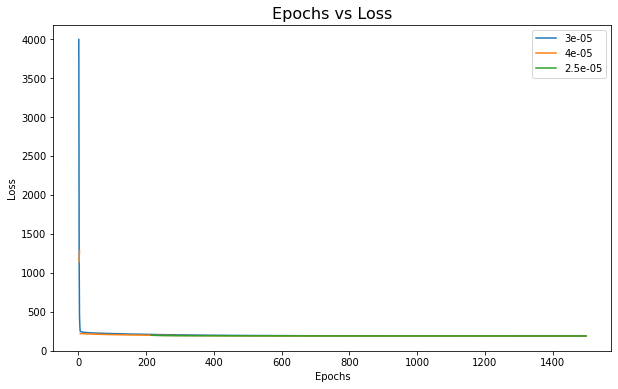

In [ ]:
# View semua proses penurunan loss untuk alpha yang berbeda
plt.figure(figsize=(10, 6))
for i in range(len(all_loss)):
  plt.plot(np.arange(1, epochs), all_loss[i][1][1:], label=all_loss[i][0])

plt.title('Epochs vs Loss', fontsize=16)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
# Kita bangun model baru dengan epoch 1500 dan learning rate 0.00003
model = gradient_descent(X.shape[1])
epochs = 1500
_ = model.fit(X, Y, epochs, 0.00003)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in multiply


In [ ]:
b = model.intercept
b


-1.286694981821877

In [ ]:
w = model.theta
w


array([ 1.03983354,  0.24929484, -0.21654209])

In [ ]:
def cross_entropy(y, y_pred):
    ce = np.dot((-1 * y), np.log(y_pred)) - np.dot((1 - y), np.log(1 - y_pred))
    return ce


def threshold(y):
  return [1 if i >= 0.5 else 0 for i in y]


In [ ]:
Test_y_List = []
for i in test_y:
    Test_y_List.append(i[0])
Test_y_List = np.array(Test_y_List)


In [ ]:
X = np.zeros((len(test_x), 3))
for i in range(len(test_x)):
  X[i, :] = extract_features(test_x[i][0], freqs)
y_pred_raw = model.predict(X, w, b)
y_pred = threshold(y_pred_raw)
Data = pd.DataFrame({
    'y_true': Test_y_List,
    'y_pred': y_pred,
    'y_pred_raw': y_pred_raw
})


In [ ]:
total = 0
correct = 0
for i in range(len(Data)):
    total = total+1
    if(Data['y_true'][i] == Data['y_pred'][i]):
        correct = correct + 1
print("Accuracy : ", correct/total)



Accuracy :  0.9320388349514563


In [ ]:
from sklearn.metrics import confusion_matrix
ConfusionMatrix = confusion_matrix(Data['y_true'], Data['y_pred'])
ConfusionMatrix

array([[190,  16],
       [ 12, 194]])

Text(0.5, 257.44, 'Predicted label')

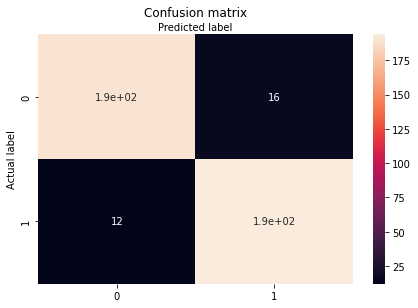

In [ ]:
import seaborn as sb
a = plt.subplot()

sb.heatmap(pd.DataFrame(ConfusionMatrix), annot=True)
a.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
search_query = "#covid19 -filter:retweets"

In [ ]:
consumer_key = 'vQguXDo1EvFAPPXqVV6BmG4TU'
consumer_secret = 'DKpvaRCs9N9M6XLU2jgu2xeyB5ywoEaqpaA5yhjb0T7ObhrO3I'
access_token = '710417521493475328-55N475XGnlnhnPZitKj1U0MPTloB3SQ'
access_token_secret = '5ANRhbSvl0mhYdJWI4hK0jD11ChyUKGCCkqK9odSWi16H'

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth)

tweets = tw.Cursor(api.search,
                   q=search_query,
                   lang="en",
                   since="2022-04-01").items(15)
TweetData = []
for tweet in tweets:
    TweetData.append(tweet)

print("Total Tweets fetched:", len(TweetData))


Total Tweets fetched: 15


In [ ]:
for SingleTweet in TweetData:
    text = api.get_status(id=SingleTweet.id, tweet_mode='extended').full_text
    X_Tweet = np.zeros((1, 3))
    X_Tweet[0, :] = extract_features(text, freqs)
    y_pred_raw = model.predict(X_Tweet, w, b)
    print(text)
    y_pred = threshold(y_pred_raw)
    print(y_pred[0])
    if y_pred[0] == 1:
      print("Positive\n\n")
    else:
      print("Negative\n\n")


@politico So @GovRonDeSantis takes away options from parents in fighting #COVID19 , what’s the logic in that? #DeathSantis
0
Negative


How to increase your Practice Revenue with Mobile Patient Applications?
Read the article to learn more
https://t.co/KRDRUlX5is
#ehr #healthcare #emr #healthcareIT #health #medical #ukraine #russia #NewsAlert #LizCheney #COVID19 #healthcarecrisis
1
Positive


COVID-19? Allergies? Common cold? Find out: The County’s no-cost @curative #COVID19 testing kiosks are open daily and accept walk-ins. 

Learn more: https://t.co/yFBRh5fYJC. 

#arlingtonva https://t.co/XdUH49cHt0
0
Negative


"Nepal reported 34 new Covid-19 cases on Friday"
#Nepal #COVID19 
https://t.co/cztR7LoT94
1
Positive


@picardonhealth @JenLeeCBC @CBCNews @ZiadFazel Is this the same attitude #nurses are dealing with ? We need doctors and nurses - not taxi drivers … #COVID19 has brought to light the serious need for #healthcare #onhealth
0
Negative


No surprise the #COVID19 figures for death

In [ ]:
text = "I'm Happy today"
X_Tweet = np.zeros((1, 3))
X_Tweet[0, :] = extract_features(text, freqs)
y_pred_raw = model.predict(X_Tweet, w, b)
print(text)
y_pred = threshold(y_pred_raw)
print(y_pred[0])
if y_pred[0] == 1:
  print("Positive\n\n")
else:
  print("Negative\n\n")

I'm Happy today
1
Positive


